In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import os
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("global air pollution dataset.csv")
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [3]:
data.shape

(23463, 12)

In [4]:
data.isnull()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,False,False,False,False,False,False,False,False,False,False,False,False
23459,False,False,False,False,False,False,False,False,False,False,False,False
23460,False,False,False,False,False,False,False,False,False,False,False,False
23461,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [6]:
data.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [7]:
np.arange(2,12)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
x=data.iloc[:,[3, 5,7, 9, 2, 4, 6, 8, 10,11]]
y=data.iloc[:,11]
y.info()
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 23463 entries, 0 to 23462
Series name: PM2.5 AQI Category
Non-Null Count  Dtype 
--------------  ----- 
23463 non-null  object
dtypes: object(1)
memory usage: 183.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AQI Category        23463 non-null  object
 1   CO AQI Category     23463 non-null  object
 2   Ozone AQI Category  23463 non-null  object
 3   NO2 AQI Category    23463 non-null  object
 4   AQI Value           23463 non-null  int64 
 5   CO AQI Value        23463 non-null  int64 
 6   Ozone AQI Value     23463 non-null  int64 
 7   NO2 AQI Value       23463 non-null  int64 
 8   PM2.5 AQI Value     23463 non-null  int64 
 9   PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [11]:
x

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,Moderate,Good,Good,Good,51,1,36,0,51,Moderate
1,Good,Good,Good,Good,41,1,5,1,41,Good
2,Moderate,Good,Good,Good,66,1,39,2,66,Moderate
3,Good,Good,Good,Good,34,1,34,0,20,Good
4,Good,Good,Good,Good,22,0,22,0,6,Good
...,...,...,...,...,...,...,...,...,...,...
23458,Unhealthy,Good,Unhealthy,Good,184,3,154,2,184,Unhealthy
23459,Good,Good,Good,Good,50,1,20,5,50,Good
23460,Good,Good,Good,Good,50,1,22,1,50,Good
23461,Moderate,Good,Good,Good,71,1,44,2,71,Moderate


In [12]:
y

0         Moderate
1             Good
2         Moderate
3             Good
4             Good
           ...    
23458    Unhealthy
23459         Good
23460         Good
23461     Moderate
23462     Moderate
Name: PM2.5 AQI Category, Length: 23463, dtype: object

In [13]:
print(data['AQI Category'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
23458    False
23459    False
23460    False
23461    False
23462    False
Name: AQI Category, Length: 23463, dtype: bool


In [14]:
print(data['CO AQI Category'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
23458    False
23459    False
23460    False
23461    False
23462    False
Name: CO AQI Category, Length: 23463, dtype: bool


In [15]:
print(data['Ozone AQI Category'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
23458    False
23459    False
23460    False
23461    False
23462    False
Name: Ozone AQI Category, Length: 23463, dtype: bool


In [16]:
print(data['NO2 AQI Category'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
23458    False
23459    False
23460    False
23461    False
23462    False
Name: NO2 AQI Category, Length: 23463, dtype: bool


In [18]:
print(data['AQI Value'].isnull().values.any())

False


In [19]:
print(data['Ozone AQI Value'].isnull().values.any())

False


In [20]:
print(data['CO AQI Value'].isnull().values.any())

False


In [21]:
print(data['NO2 AQI Value'].isnull().values.any())

False


In [22]:
print(data['PM2.5 AQI Value'].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
23458    False
23459    False
23460    False
23461    False
23462    False
Name: PM2.5 AQI Value, Length: 23463, dtype: bool


In [23]:
print(data['PM2.5 AQI Value'].isnull().values.any())

False


In [24]:
print(data['Country'].isnull().values.any())

True


In [25]:
print(data['City'].isnull().values.any())

True


In [26]:
try:
    data.loc[data['Country' == 'Unknown']]
except KeyError:
    print('None')
    

# Fill the nans.
data['Country'] = data['Country'].fillna('Unknown')
print(f"Missing values: {data['Country'].isna().sum()}")

None
Missing values: 0


In [27]:
try:
    data.loc[data['City' == 'Unknown']]
except KeyError:
    print('None')
    

# Fill the nans.
data['City'] = data['City'].fillna('Unknown')
print(f"Missing values: {data['City'].isna().sum()}")

None
Missing values: 0


In [28]:
print(data['Country'].isnull().values.any())

False


In [29]:
print(data['City'].isnull().values.any())

False


In [30]:
def unique (i):
    print("In{}".format(i))
    print(data[i].unique())
    print("**************************************")
    
for i in data.columns:
    unique(i)

InCountry
['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Bolivia (Plurinational

In [60]:
def label(i):
    data[i] = LabelEncoder().fit_transform(data[i])
    return data[i]

for i in data.iloc[:,:4].columns:
    label(i)

data

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16525,2,0,0,0,45,1,36,0,51,2
1,22,16546,0,0,0,0,35,1,5,1,41,0
2,75,16582,2,0,0,0,60,1,39,2,66,2
3,123,16618,0,0,0,0,28,1,34,0,20,0
4,54,16699,0,0,0,0,16,0,22,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7521,3,0,2,0,178,3,154,2,184,3
23459,54,18631,0,0,0,0,44,1,20,5,50,0
23460,69,13502,0,0,0,0,44,1,22,1,50,0
23461,166,22597,2,0,0,0,65,1,44,2,71,2


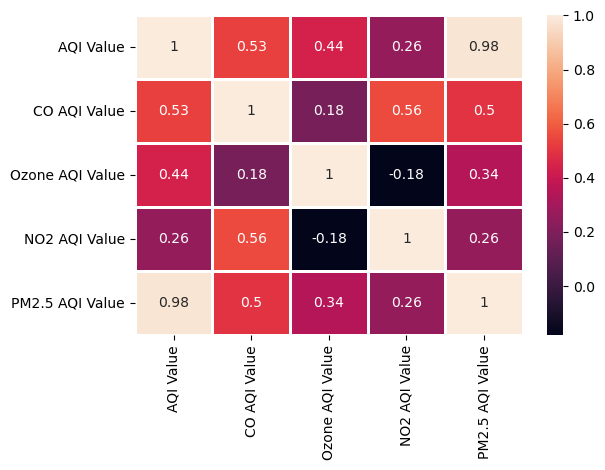

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
data=data.iloc[:,[0,  1, 3, 5,7, 9, 2, 4, 6, 8, 10,11]]
data
sns.heatmap(data.iloc[:,6:-1].corr(), annot = True, linewidths = 1)
plt.tight_layout()
plt.show()

In [35]:
plt.rcParams['figure.figsize'] = (300,400)
plt.subplot(5,10, 1)
sns.barplot(data['AQI Value'], data['PM2.5 AQI Category'])
plt.ylabel(' ')
plt.xlabel('AQI Value', fontsize = 150)
plt.yticks(fontsize = 90)
plt.subplot(5, 10, 2)
sns.barplot(data['CO AQI Value'],data['PM2.5 AQI Category'] )
plt.ylabel(' ')
plt.xlabel('CO AQI Value', fontsize = 150)
plt.yticks(fontsize = 90)
plt.subplot(5, 10, 3)
sns.barplot(data['Ozone AQI Value'],data['PM2.5 AQI Category'] )
plt.ylabel(' ')
plt.xlabel('Ozone AQI Value', fontsize = 150)
plt.yticks(fontsize = 90)
plt.subplot(5, 10, 4)
sns.barplot(data['NO2 AQI Value'], data['PM2.5 AQI Category'])
plt.ylabel(' ')
plt.xlabel('NO2 AQI Value', fontsize = 150)
plt.yticks(fontsize = 90)
plt.subplot(5, 10, 5)
sns.barplot(data['PM2.5 AQI Value'], data['PM2.5 AQI Category'])
plt.ylabel(' ')
plt.xlabel('PM2.5 AQI Value', fontsize = 150)
plt.yticks(fontsize = 90)
plt.suptitle('Visualizing the PM2.5 AQI Category based on AQI Value', fontsize = 150)
plt.show()

In [38]:
col = list(data.columns)
x = col[:-1]

display(x)

y = col[-1]
display(y)

['Country',
 'City',
 'AQI Category',
 'CO AQI Category',
 'Ozone AQI Category',
 'NO2 AQI Category',
 'AQI Value',
 'CO AQI Value',
 'Ozone AQI Value',
 'NO2 AQI Value',
 'PM2.5 AQI Value']

'PM2.5 AQI Category'

In [41]:
y = data['PM2.5 AQI Category']
x = data.drop(['City','Country'], axis = 1)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (23463, 10)
Shape of y: (23463,)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8 , random_state = 0)

In [43]:
display(x_train,x_test)

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
7252,0,0,0,0,37,1,36,0,43,0
19728,0,0,0,0,44,1,17,5,50,0
19284,3,0,2,0,157,3,163,0,158,3
20759,0,0,0,0,44,1,13,2,50,0
8782,3,0,2,0,166,4,172,1,171,3
...,...,...,...,...,...,...,...,...,...,...
13123,5,0,4,0,195,2,201,5,134,4
19648,0,0,0,0,28,0,34,1,20,0
9845,3,0,0,0,159,5,19,12,165,3
10799,0,0,0,0,23,0,29,2,27,0


,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
17196,3,0,0,0,154,9,5,5,160,3
10495,0,0,0,0,26,1,31,1,32,0
5753,2,0,0,0,55,1,28,6,61,2
15677,0,0,0,0,30,1,36,0,26,0
9337,0,0,0,0,37,0,43,0,12,0
...,...,...,...,...,...,...,...,...,...,...
3668,2,0,0,0,82,1,29,0,88,2
19034,0,0,0,0,28,0,21,0,34,0
5487,2,0,0,0,45,1,39,1,51,2
3373,4,0,0,0,128,1,19,2,134,4


In [44]:
display(y_train)

7252     0
19728    0
19284    3
20759    0
8782     3
        ..
13123    4
19648    0
9845     3
10799    0
2732     0
Name: PM2.5 AQI Category, Length: 16424, dtype: int64

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
def evaluator(y_test, y_pred):    
    print('Accuracy : ', accuracy_score(y_test,y_pred))
    print('')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(10,10),show_normed=True)
    plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
    plt.show()

In [49]:
import pandas as pd
model_accuracy = pd.DataFrame(columns=['Model','Accuracy','Train_acc'])
model= {
          "KNN" : KNeighborsClassifier(),
         "DT" : DecisionTreeClassifier(),
}
for test, clf in model.items():
 clf.fit(x_train,y_train)

In [50]:
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("\n", test + ' scores')
print(acc)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('*' * 100,"\n")


 DT scores
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3007
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00      2724
           3       1.00      1.00      1.00       658
           4       1.00      1.00      1.00       499
           5       1.00      1.00      1.00        91

    accuracy                           1.00      7039
   macro avg       1.00      1.00      1.00      7039
weighted avg       1.00      1.00      1.00      7039

[[3007    0    0    0    0    0]
 [   0   60    0    0    0    0]
 [   0    0 2724    0    0    0]
 [   0    0    0  658    0    0]
 [   0    0    0    0  499    0]
 [   0    0    0    0    0   91]]
[[3007    0    0    0    0    0]
 [   0   60    0    0    0    0]
 [   0    0 2724    0    0    0]
 [   0    0    0  658    0    0]
 [   0    0    0    0  499    0]
 [   0    0    0    0    0   91]]
*******************************************

In [51]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy','Train_acc'])
model_accuracy= model_accuracy.append({'Model': y_test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index= True)

In [52]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
0,17196 3 10495 0 5753 2 15677 0 93...,1.0,1.0


Accuracy :  0.9967324904105697

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3007
           1       1.00      0.98      0.99        60
           2       1.00      1.00      1.00      2724
           3       0.97      1.00      0.99       658
           4       1.00      0.97      0.98       499
           5       0.99      0.97      0.98        91

    accuracy                           1.00      7039
   macro avg       0.99      0.99      0.99      7039
weighted avg       1.00      1.00      1.00      7039

Confusion Matrix: 




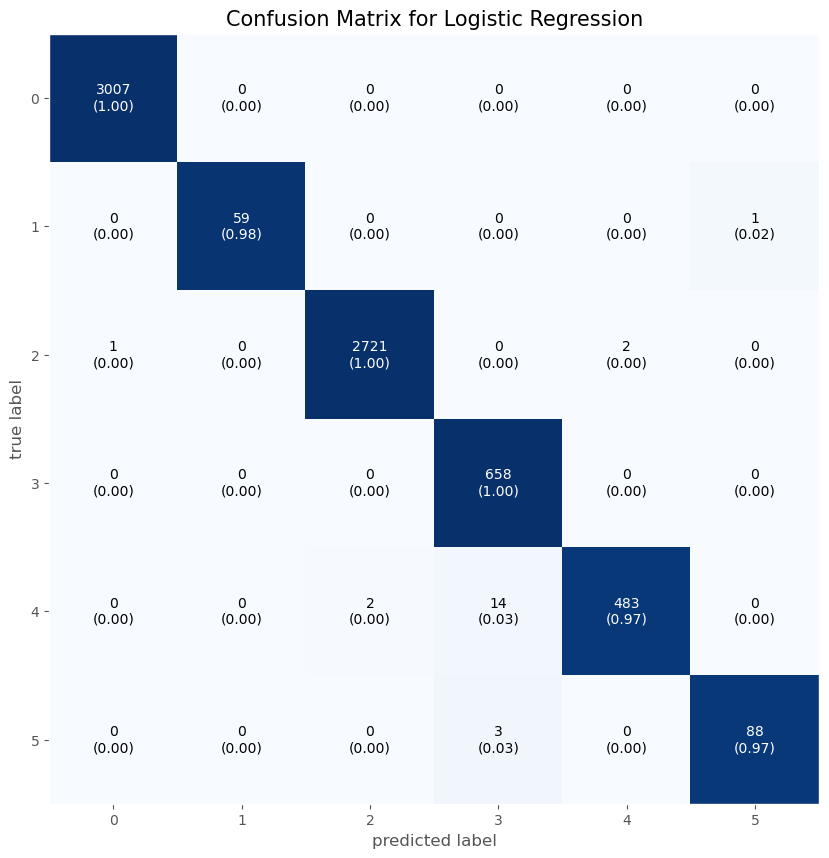

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,2,0,0,0,45,1,36,0,51,2
1,Brazil,Presidente Dutra,0,0,0,0,35,1,5,1,41,0
2,Italy,Priolo Gargallo,2,0,0,0,60,1,39,2,66,2
3,Poland,Przasnysz,0,0,0,0,28,1,34,0,20,0
4,France,Punaauia,0,0,0,0,16,0,22,0,6,0


In [53]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(x_train,y_train)
pred_kn = kn_classifier.predict(x_test)
evaluator(y_test, pred_kn)
data.head()


In [54]:
prediction = kn_classifier.predict((np.array([[
                                       0,
                                       2,
                                       15,
                                       3,
                                       0,
                                       1,
                                       13,
                                      10,
                                        15,
                                     2]])))
print("The predicted PM2.5 AQI Category and AQI Value is :", prediction)

The predicted PM2.5 AQI Category and AQI Value is : [0]


In [63]:
data[data['PM2.5 AQI Category'] == '2'].head()

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category


Accuracy :  1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3007
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00      2724
           3       1.00      1.00      1.00       658
           4       1.00      1.00      1.00       499
           5       1.00      1.00      1.00        91

    accuracy                           1.00      7039
   macro avg       1.00      1.00      1.00      7039
weighted avg       1.00      1.00      1.00      7039

Confusion Matrix: 




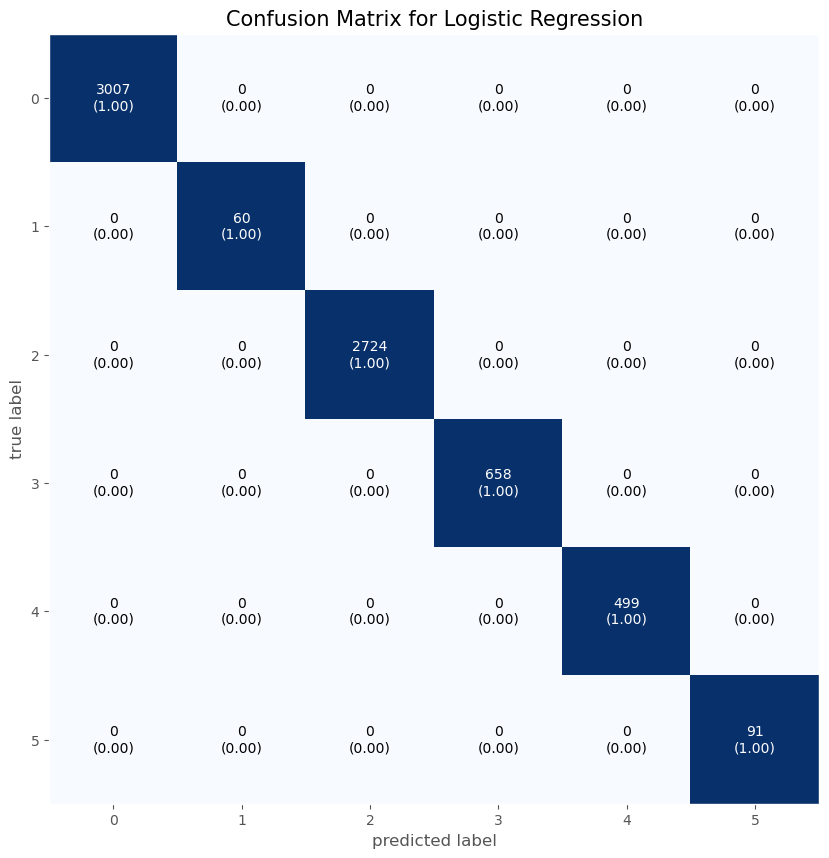

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16525,2,0,0,0,45,1,36,0,51,2
1,22,16546,0,0,0,0,35,1,5,1,41,0
2,75,16582,2,0,0,0,60,1,39,2,66,2
3,123,16618,0,0,0,0,28,1,34,0,20,0
4,54,16699,0,0,0,0,16,0,22,0,6,0


In [67]:
from sklearn.tree import DecisionTreeClassifier
dn_classifier = DecisionTreeClassifier()
dn_classifier.fit(x_train,y_train)
pred_kn = dn_classifier.predict(x_test)
evaluator(y_test, pred_kn)
data.head()
